# 5. 모델평가
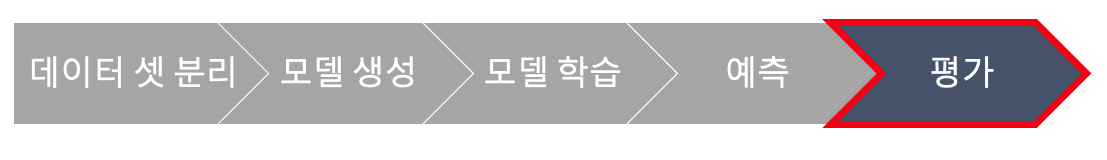

- 모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
- sckit-learn 평가 함수는 sklearn.metrics 모듈을 통해 제공한다. 
- 분류와 회귀에 따라 평가 방법이 다르다. 
- 분류 평가 지표 : 맞췄니/안맞췄니 나눠서 결과
    1. 정확도 (Accuracy)
    1. 정밀도 (Precision)
    1. 재현률/민감도 (Recall)
    1. F1점수 (F1 Score)
    1. PR Curve, AP
    1. ROC, AUC


- 회귀 평가 지표 : 실수값으로 결과가 나오며 오차범위 
    1. MSE (Mean Squared Error)
    1. RMSE (Root Mean Squared Error)
    1. $R^2$ (결정계수)




## 5.1 분류(Classsification) 평가 기준
- 양성(Positive) : 찾으려는(예측하는) 대상
- 음성(Negative) : 예측 대상이 아닌 것
|예시|양성(Positive)|음성(Negative)|
|--|--|--|
|암환자 분류|암환자|정상인|
|스팸메일 분류|스팸메일|정상메일|
|금융사기 모델|사기거래|정상거래|


## 5.2. 균형 데이터셋
### 5.2.1 정확도 (Accuracy)
$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- accuracy_score(모델예측값, 정답)
- 문제점 
    - 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

<P><b>연습 MNIST</b></P>


- 손글씨 데이터 셋
- 사이킷런 제공 image size: 8 X 8 
- [MNIST 위키](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)

(1797, 64) (1797,)


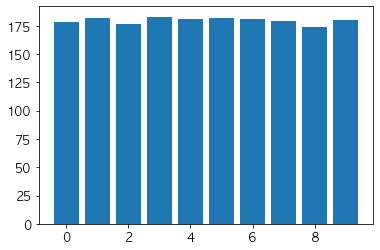

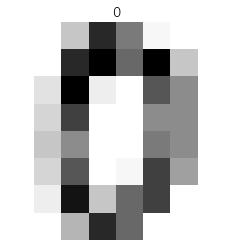

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# data 
digits = load_digits()
X, y = digits['data'], digits['target']
print(X.shape, y.shape) 
cnt = np.unique(y, return_counts = True) # 0 ~ 9 각각의 갯수 저장

# 막대그래프로 표현해보기
plt.bar(cnt[0], cnt[1])
plt.show()

#  각 축의 의미 확인
# X : 손글씨 숫자 이미지 , X.shape 
# X.shape : (1797, 64) --> (갯수, 이미지구성)
# 숫자 0에 대해 확인해보자 
no0 = X[0].reshape(8,8) # 64 = 8*8 
no0

plt.imshow(no0, cmap='Greys')
plt.axis('off') # 축 없애기 
plt.title(y[0])
plt.show()

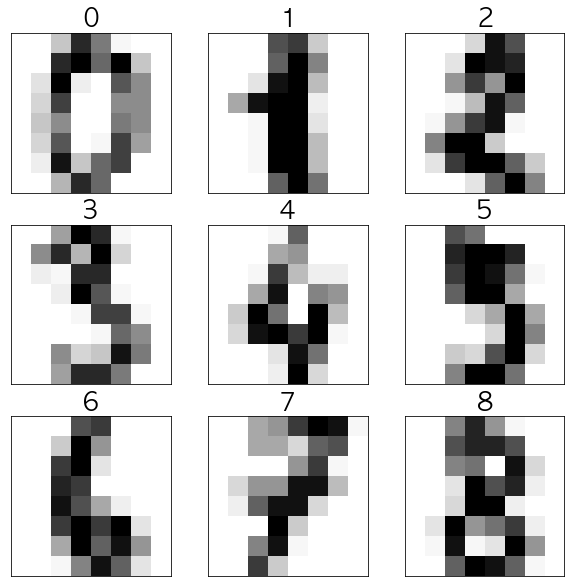

In [99]:
# 0 - 8까지 표현해보자 
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[i].reshape(8,8), cmap='Greys') #0 ~ 8
#     plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.title(y[i], fontdict={'fontsize':25})

plt.show()

## 5.3 불균형 데이터셋
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

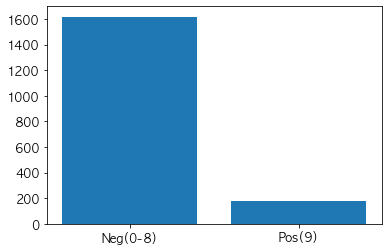

- train 전체 중에 False, True의 비율: [0.89977728 0.10022272]
- test  전체 중에 Fasle, True의 비율: [0.9 0.1]
- train 정확도 : 0.8997772828507795
- test  정확도 : 0.9
- 정확도 : 0.1018363939899833


In [14]:
# 불균형 데이터 셋으로 만들기 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator # 모델 생성 
from sklearn.metrics import accuracy_score 

# data 
digits = load_digits()
X, y = digits['data'], digits['target']
y = y == 9 # 9니? 9는 True(1), 나머지는 False(0) 
cnt2 = np.unique(y, return_counts = True)

# 그래프 그려보기
plt.bar(cnt2[0], cnt2[1])
plt.xticks([0,1], labels = ['Neg(0-8)','Pos(9)'])
plt.show()

# 훈련, 데스트 데이터셋 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
print('- train 전체 중에 False, True의 비율:',np.unique(y_train, return_counts = True)[1]/y_train.size)
print('- test  전체 중에 Fasle, True의 비율:',np.unique(y_test, return_counts = True)[1]/y_test.size)

# 모델 생성 
class MyModel(BaseEstimator):
    def fit(self, X, y):
        cnt = np.unique(y, return_counts=True)
        max_idx = cnt[1].argmax() #max값의 index를 반환
        self.pred = cnt[0][max_idx]  #최빈값을 instance 변수에 저장.
    
    def predict(self, X):
        return np.full(shape=(X.shape[0], 1), fill_value=self.pred)
        
model = MyModel()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('- train 정확도 :', accuracy_score(y_train, pred_train))
print('- test  정확도 :', accuracy_score(y_test, pred_test))

model = MyModel()
model.fit(X, digits['target'])
pred_X = model.predict(X)
np.unique(pred_X)

print('- ?? 정확도 :', accuracy_score(digits['target'], pred_X))

# todo : 여기 설명 필요 
- 9아니야 라고 예측하게 되면 -> 90% 맞는건데, 과연 잘 맞는 모델인건가? 아니다. 
- 불균형 데이터의 문제점을 확인하는 과정이다. 
- 불균형 데이터일때는 

### 5.3.1 혼동 행렬(Confusion Marix)
- 분류의 평가지표의 기준으로 사용된다.
- 혼동행렬을 이용해 다양한 평가지표(정확도, 재현률, 정밀도, F1 점수, AUC 점수)를 계산할 수 있다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제(Ground Truth) class, 1번 축: 예측 class


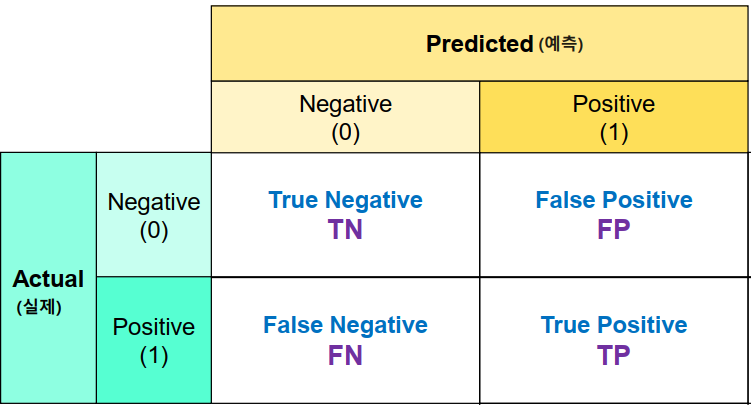
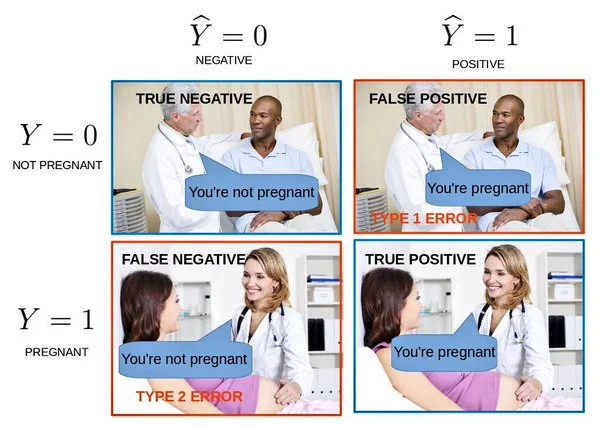



- TP(True Positive) - 양성으로 예측했는데 맞은 개수
- TN(True Negative) - 음성으로 예측했는데 맞은 개수
- FP(False Positive) - 양성으로 예측했는데 틀린 개수 (음성을 양성으로 예측)
- FN(False Negative) - 음성으로 예측했는데 틀린 개수 (양성을 음성으로 예측)

<P><b>Dummy 모델 혼동행렬</b></P>


- plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 
- pip install scikit-learn --upgrade

- train confusion matrix :
 [[1212    0]
 [ 135    0]]
- test  confusion matrix :
 [[405   0]
 [ 45   0]]


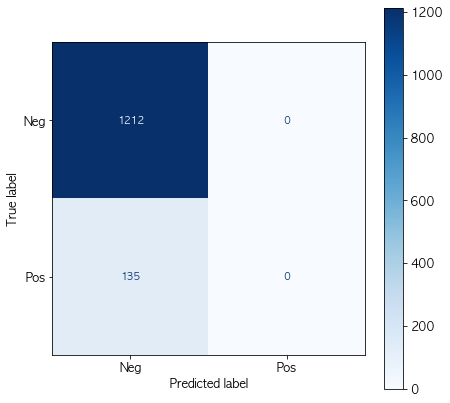

In [23]:
# 예시 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.dummy import DummyClassifier

# (pred_train, y_train), (tred_test, y_test)
# 예측을 전부 0으로 했다. 

print('- train confusion matrix :\n', confusion_matrix(y_train, pred_train)) # 1212맞음, 135 틀림
print('- test  confusion matrix :\n', confusion_matrix(y_test, pred_test)) # 405 맞음, 45 틀림

# 2차원 배열로 보기에 불편하니 이걸 그래프로 보여주는게 plot_confusion_matrix로 볼수 있다. 
dummy_model = DummyClassifier(strategy = 'most_frequent') # 더미모델 생성(가짜모델) , 최빈값 
dummy_model.fit(X_train, y_train)
fig, ax = plt.subplots(1,1, figsize=(7,7))
plot_confusion_matrix(dummy_model, #학습시킬 모델
                     X_train, #X
                     y_train, #y
                     display_labels = ['Neg', "Pos"], 
                     cmap = "Blues",
                     ax = ax
                    )
plt.show()

### 5.3.2 평가 기준?지표?
- ### Accuracy (정확도) 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- ### Recall/Sensitivity(재현율/민감도) 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- ### Precision(정밀도) 
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- ### F1 점수
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.
    
### 기타
- ### Specificity(특이도)
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - TNR(True Negative Rate) 라고도 한다.
- ### Fall out(위양성률)
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율.
    - **FPR** (False Positive Rate) 라고도 한다.
    - $ Fall-Out(FPF) = \cfrac{FP}{TN+FP}$
    - $1 - 특이도$
    
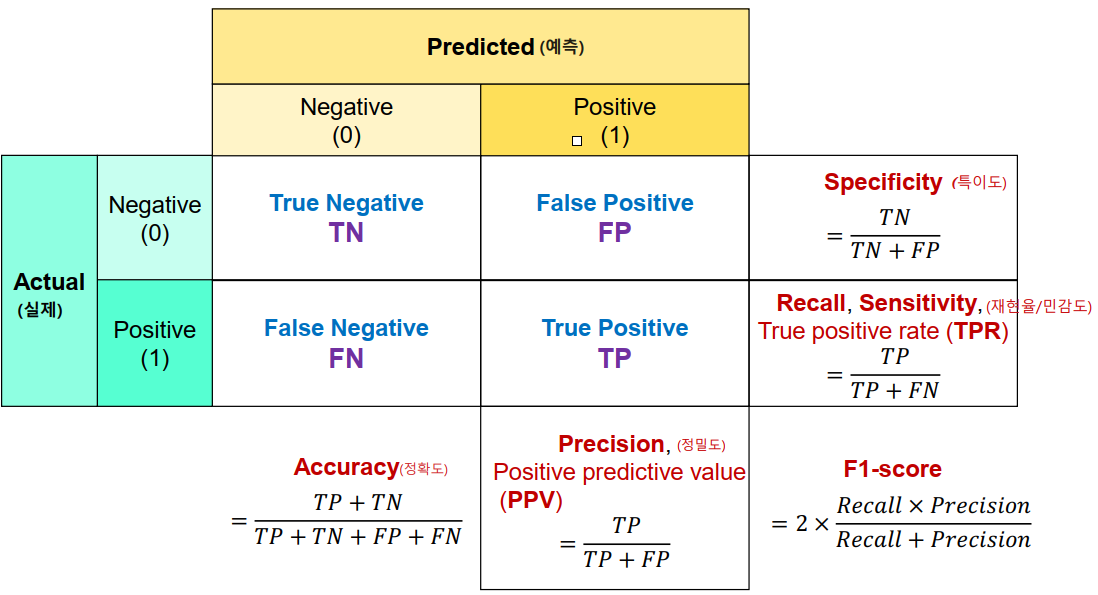

In [ ]:
print("- Accuracy_score_train:",accuracy_score(y_train,pred_train))
print('- Accuraty_score_test :',accuracy_score(y_test, pred_test))

 # 실제 9(양성)중에 9로 잘 예측한 것
print('- Recall_score_train :', recall_score(y_train, pred_train))
print('- Recall_score_test  :', recall_score(y_test, pred_test))
 
print('- Precision_score_train :', precision_score(y_train, pred_train))
print('- Precision_score_test  :', precision_score(y_test, pred_test))

print('- f1 score_train : ', f1_score(y_train, pred_train))
print('- f1 score_test  : ', f1_score(y_test, pred_test))

### 5.3.3  평가 지표
- sklearn.metrics 모듈
|번호|평가 지표 계산 함수|내용|
|--|--|--|
|1|accuracy_score(y 실제값, y 예측값)|정확도 점수 반환|
|2|confusion_matrix(y 실제값, y 예측값)|혼돈 행렬 반환|
|3|recall_score(y 실제값, y 예측값)|Recall(재현율) 점수 반환 <br>Positive 중 Positive로 예측한 비율 (TPR)|
|4|precision_score(y 실제값, y 예측값)|Precision(정밀도) 점수 반환 <br>Positive로 예측한 것 중 Positive인 것의 비율 (PPV)|
|5|f1_score(y 실제값, y 예측값)|F1 점수 반환 <br>recall과 precision의 조화 평균값
|
|6|classification_report(y 실제값, y 예측값)|클래스 별로 recall, precision, f1, accuracy 점수를 종합해서 보여준다.|

In [58]:
# 머신러닝 모델을 통해 학습을 해보자 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 모델 생성
tree = DecisionTreeClassifier(max_depth = 3)
rf = RandomForestClassifier(n_estimators = 200)

# 모델 학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 예측
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

# confusion matrix
print('- tree confusion_train :\n',confusion_matrix(y_train, pred_train_tree))
print('- tree confusion_test  :\n',confusion_matrix(y_test, pred_test_tree))
print('- rf   confusion_train :\n',confusion_matrix(y_train, pred_train_rf))
print('- rf   confusion_test  :\n',confusion_matrix(y_test, pred_test_rf))

print("\nTree모델 평가지표")
print('- accuracy_score  :',accuracy_score(y_test, pred_test_tree))
print('- recall_score    :',recall_score(y_test, pred_test_tree))
print('- precision_score :',precision_score(y_test, pred_test_tree))
print('- f1_score        :',f1_score(y_test, pred_test_tree))

print('\nRandomForest 모델 평가지표')
print('- accuracy_score  :',accuracy_score(y_test, pred_test_rf))
print('- recall_score    :',recall_score(y_test, pred_test_rf))
print('- precision_score :',precision_score(y_test, pred_test_rf))
print('- f1_score        :',f1_score(y_test, pred_test_rf))

# classification_report()
result = classification_report(
    y_test, 
    pred_test_rf, 
#     target_names = ["pos(not 9)", "pos(9)"]
)
print()
print('=============== classification_report() ================')
print(result) 

- tree confusion_train :
 [[1174   38]
 [  29  106]]
- tree confusion_test  :
 [[387  18]
 [  9  36]]
- rf   confusion_train :
 [[1212    0]
 [   0  135]]
- rf   confusion_test  :
 [[405   0]
 [ 11  34]]

Tree모델 평가지표
- accuracy_score  : 0.94
- recall_score    : 0.8
- precision_score : 0.6666666666666666
- f1_score        : 0.7272727272727272

RandomForest 모델 평가지표
- accuracy_score  : 0.9755555555555555
- recall_score    : 0.7555555555555555
- precision_score : 1.0
- f1_score        : 0.8607594936708861

=============== classification_report() ================
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       405
        True       1.00      0.76      0.86        45

    accuracy                           0.98       450
   macro avg       0.99      0.88      0.92       450
weighted avg       0.98      0.98      0.97       450



## 5.4 재현율과 정밀도의 관계
- 이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다


- <b>Recall(재현율)이 더 중요한 경우</b>
    - 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
    - FN(False Negative)를 낮추는데 촛점을 맞춘다.
    - 예) 암환자 판정 모델, 보험사기적발 모델
    
    

- <b>Precision(정밀도)가 더 중요한 경우</b>
    - 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
    - FP(False Positive)를 낮추는데 초점을 맞춘다.
    - 예) 스팸메일 판정


- FN, FP를 줄여서 재현율, 정밀도는 조절하기 위해서는? 임계값을 통해 조정

### 5.4.1 임계값(Threshold)
- 임계값 : 모델이 분류의 답을 결정할 때 기준값
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다. 
- 예) 암환자 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 암환자로 예측하게 된다.



### 5.4.2 임계값과 정밀도,재현율 관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 음의 상관관계를 가진다.**
- 임계값을 변화시켰을때 재현율과 위양성율(Fall-Out/FPR)은 양의 상관관계를 가진다.

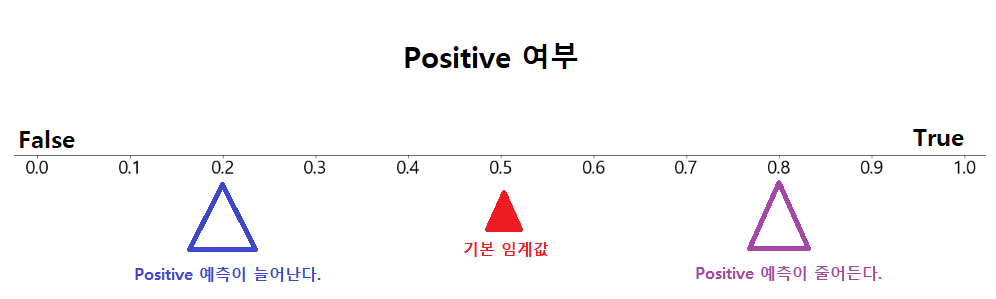

In [60]:
# proba : probabilty (확률) [false일 확률, True일 확률]
p = tree.predict_proba(X_test[:3])
p # False확률이 높은 상황. 

# positive인 True의 확률만 보게되면, 0.5를 기준으로 해서 크냐 작냐에 따라서 positive의 예측이 달라진다. 
# Negative 0.5 Positive 
# 임계값 조정에 따라서 Positive 예측이 달라진다. 

array([[0.99830221, 0.00169779],
       [0.93765586, 0.06234414],
       [0.99830221, 0.00169779]])

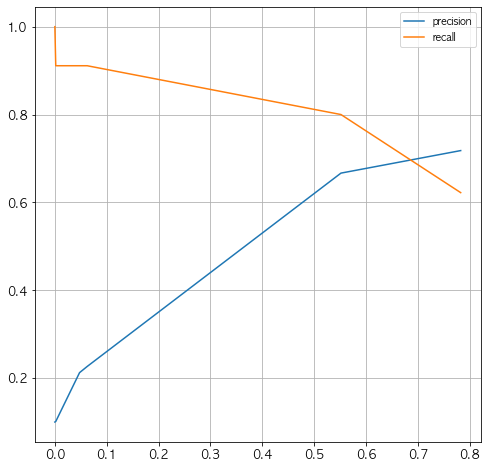

In [72]:
# 임계값 변화에 따른 recall, precision 변화

from sklearn.metrics import precision_recall_curve
import pandas as pd

pos_proba = tree.predict_proba(X_test)[:, 1] # positive 확률만 추출
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
precisions.shape, recalls.shape, thresholds.shape # thresholds 1 작다. 

pd.DataFrame({
    'threshold' : thresholds, # 1작기 때문에 
    'precision' : precisions[:-1], # 크기 맞춰주기 위해 -1
    'recall'    : recalls[:-1] # 크기 맞춰주기 위해 -1
})


# 임계값에 따라서 positive 예측률을 증감할수 있으니 그에 따라서 recall과 precision값이 달라진다. 
# recall과 precision는 반비례 관계이다. 

# 반비계 관계를 그래프로 확인해보자. 
plt.figure(figsize=(8,8))
plt.plot(thresholds, precisions[:-1], label='precision')
plt.plot(thresholds, recalls[:-1], label='recall')
plt.legend()
plt.grid(True)
plt.show()

# 그래프를 통해 확인할 수 있는 것 : 만약 precision, recall균형있는 값을 원한다면 0.6 조금 넘는 값 으로 threshold값을 잡아주면 된다. 

### 5.4.3 임계값 변경 
- Binarizer의 Transformer로 양성 여부를 선택하는 임계값을 변경할 수 있다.

In [ ]:
from sklearn.preprocessing import Binarizer

example = [[-0.3, 0.5, 0.7, 0.4, 0.6]]
bi = Binarizer(threshold = 0.8) # default : 0.0 
bi.fit(example)
bi.transform(example) # threshold 0.8 보다 작으면 0, 크면 1 

In [93]:
# 머신러닝 모델에 적용해보자
pos_proba = tree.predict_proba(X_test) 

# binarizer = Binarizer(threshold = 0.5) # 임계값 0.5 설정 
binarizer = Binarizer(threshold=0.01)
binarizer = Binarizer(threshold=0.1)
binarizer = Binarizer(threshold=0.6)

binarizer.fit(pos_proba)
predict = binarizer.transform(pos_proba)[:,1] 

accuracy_score(pred_test_tree, predict) # 임계값에 따라서 값이 달라짐. 
print('- recall score    :',recall_score(y_test, predict))
print('- precision score :',precision_score(y_test, predict))

- recall score    : 0.6222222222222222
- precision score : 0.717948717948718


## 5.5 PR Curve, AP score
- PR Curve(Precision Recall Curve-정밀도 재현율 곡선)
    - 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
    - X축에 재현율, Y축에 정밀도를 놓고 임계값이 0 → 1 변화할때 두 값의 변화를 선그래프로 그린다.
    - PR curve(Precision Recall 커브): **양성 클래스 탐지**가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)
    
    
- AP Score(Average Precision Score)
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
    
    
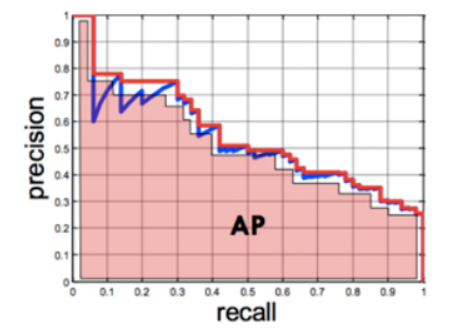

<function matplotlib.pyplot.show(close=None, block=None)>

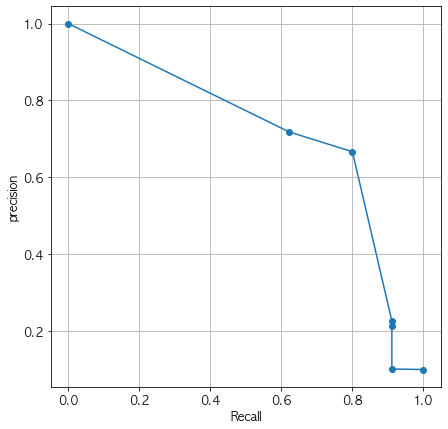

In [95]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score  

# model 
pos_proba = tree.predict_proba(X_test)[:, 1] # 1번 인덱스를 가져온다. 왜? positive만 추출 

# 객체생성 
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba) # y 값, positive에 대한 예측 확률을 줘야 한다.  

thresholds = np.append(thresholds,1) # threshold가 값이 하나 작으니 1추가해주자 
precisions.shape, recalls.shape, thresholds.shape

# 그래프 그리기 
# 그래프 그릴 때 recall, precision만 있으면 된다고 하는데 threshold는 왜 ? 
pd.DataFrame({
    "Threshold" : thresholds,
    "recall" : recalls,
    "precision" : precisions
})

plt.figure(figsize = (7,7))
plt.plot(recalls, precisions, marker = 'o')
plt.xlabel('Recall')
plt.ylabel('precision')
plt.grid(True)
plt.show

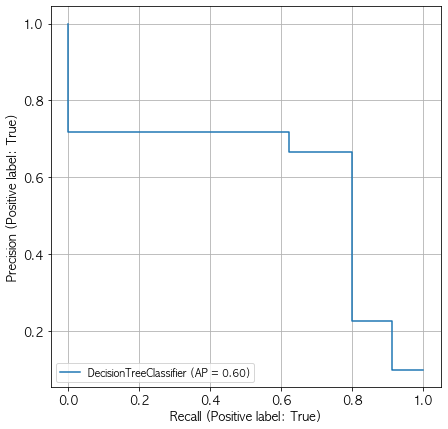

- AP score : 0.5992998693551179


In [100]:
# 그래프를 각지게 만들어보자 
fig, ax = plt.subplots(1, 1, figsize = (7,7))  # ax 를 왜 뽑지? 
plot_precision_recall_curve(tree, # 모델 
                           X_test, # X값
                           y_test, # y값
                           ax = ax
)
plt.grid(True)
plt.show()

# Ap스코어를 확인해보자 
print('- AP score :',average_precision_score(y_test, pos_proba)) # (y값, positive 예측확률)

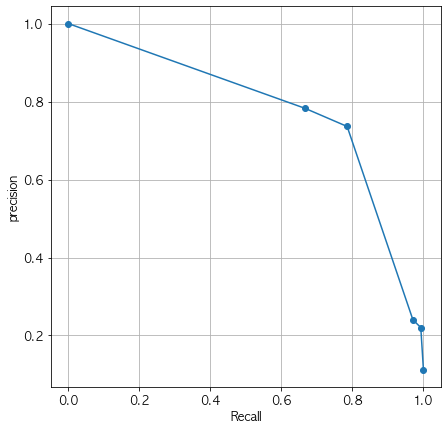

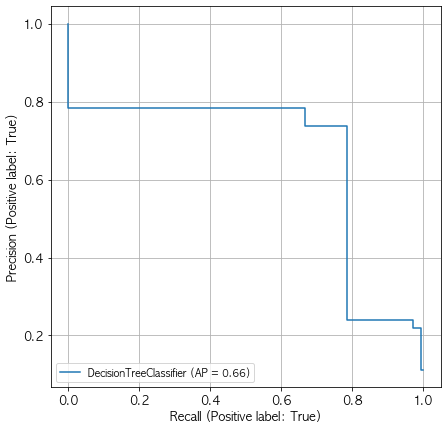

- AP score : 0.6592274138060265


In [105]:
# - train_set에 대해 PR curve, AP score 출력해보자
# - 판다스 DataFrame으로 PR Curve반환값 생성 해보자 

from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score  

pos_proba_train = tree.predict_proba(X_train)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, pos_proba_train)
thresholds = np.append(thresholds,1)


# 그래프 그리기 
pd.DataFrame({
    "Threshold" : thresholds,
    "recall" : recalls,
    "precision" : precisions
})

plt.figure(figsize = (7,7))
plt.plot(recalls, precisions, marker = 'o')
plt.xlabel('Recall')
plt.ylabel('precision')
plt.grid(True)
plt.show

# 그래프를 각지게 만들어보자 
fig, ax = plt.subplots(1, 1, figsize = (7,7))  # ax 를 왜 뽑지? 
ax = plt.gca() # gca : get current axes, 현재 
plot_precision_recall_curve(tree, # 모델 
                           X_train, # X값
                           y_train, # y값
                           ax = ax
)
plt.grid(True)
plt.show()

# Ap스코어를 확인해보자 
print('- AP score :',average_precision_score(y_train, pos_proba_train)) # (y값, positive예측확률)

## 5.6 ROC curve, AUC score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out) : 실제 음성중 양성으로 잘못 예측 한 비율
    - 1-특이도(TNR)
    $$
    \cfrac{FP}{TN+FP}
    $$
    
    
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
    
    
- **ROC curve**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
    - roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
    - ROC: 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 **중요도가 비슷할 때 사용**(개고양이 분류)
    
    
- **AUC score**
    - ROC 곡선 아래쪽 면적
    - roc_auc_score(y값, 예측확률) : AUC 점수 반환
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
    |AUC 점수|기준|
    |--|--|
    |1.0 ~ 0.9|아주 좋음|
    |0.9 ~ 0.8|좋음|
    |0.8 ~ 0.7|괜찮은 모델|
    |0.7 ~ 0.6|의미는 있으나 좋은 모델은 아님|
    |0.6 ~ 0.5|좋지 않은 모델|
    
    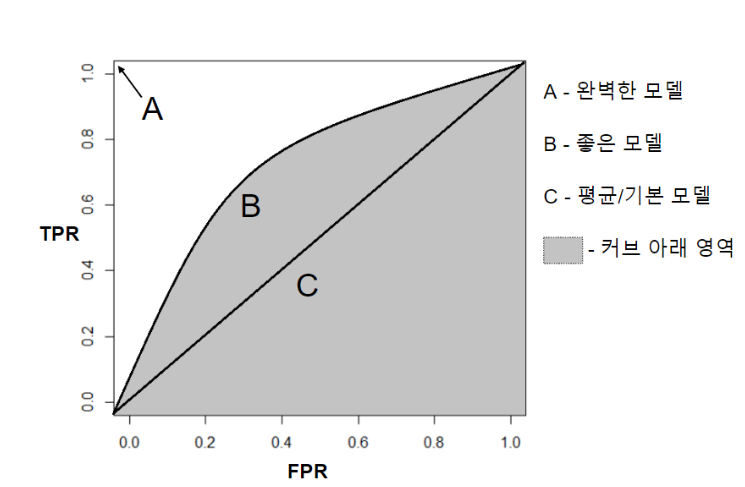
    
    
>  ROC Curve vs PR Curve
> - ROC: 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 **중요도가 비슷할 때 사용**(개고양이 분류)
> - PR curve(Precision Recall 커브): **양성 클래스 탐지**가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)


shape:  (47,) (47,) (47,)


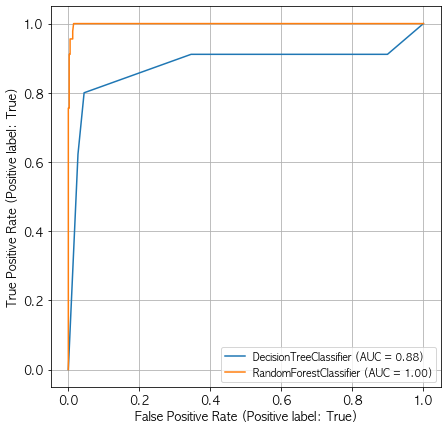

- tree roc_auc_score : 0.879122085048011
- rf   roc_auc_score : 0.9988203017832648


In [112]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

pos_proba_tree = tree.predict_proba(X_test)[:,1] # 양성에 대한 예측 확률
pos_proba_rf = rf.predict_proba(X_test)[:,1] 

# roc_curve(y, positive예측확률)
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test, pos_proba_tree) 
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, pos_proba_rf) 

fpr_tree.shape, tpr_tree.shape, threshold_tree.shape
print('shape: ',fpr_rf.shape, tpr_rf.shape, threshold_rf.shape) 

pd.DataFrame(dict(th = threshold_tree, fpr = fpr_tree, tpr = tpr_tree))

# curve 그래프를 그려보자 
plt.figure(figsize = (7,7))
ax = plt.gca()
plot_roc_curve(tree, X_test, y_test, ax = ax)
plot_roc_curve(rf, X_test, y_test, ax = ax)
plt.grid(True)
plt.show()

# 점수 확인 
print('- tree roc_auc_score :',roc_auc_score(y_test, pos_proba_tree))
print('- rf   roc_auc_score :',roc_auc_score(y_test, pos_proba_rf))